<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Copy_of_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('heart (5).csv')

dataset.head()
import seaborn as sns

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
X=dataset.drop(columns='target',axis=1)

In [ ]:
Y=dataset['target']

In [ ]:
X_array=np.array(X)
Y_array=np.array(Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [ ]:
X_dataset=sc.fit_transform(X_array)

In [ ]:
X_dataset

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
Y_dataset=Y_array

In [ ]:
shape=(Y_dataset.size,Y_dataset.max()+1)

In [ ]:
one_hot_encoded=np.zeros(shape)

In [ ]:
for i in range(len(Y_dataset)):
  x=Y_dataset[i]
  for j in range(2):
    if(j==x):
      one_hot_encoded[i][j]=1
    else:
      one_hot_encoded[i][j]=0

In [ ]:
one_hot_encoded[0]

array([0., 1.])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X_dataset,one_hot_encoded,test_size=0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(16,input_dim=13,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=1000,batch_size=32)

Epoch 1/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5662
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6029
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6397
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6691
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.7022
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7353
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7574
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7868
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.8015
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8015
Epoch 11/1000
9/9 [

In [ ]:
X_test_standard=sc.transform(X_test)

In [ ]:
Y_predict=model.predict(X_test)

In [ ]:
Y_predict

**Plotting Confusion Matrix**

In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cmatrix=confusion_matrix(Y_test.argmax(axis=1),Y_PRED.argmax(axis=1))

In [ ]:
cm_df = pd.DataFrame(cmatrix,
                     index = ['Not_Affected','Affected'], 
                     columns = ['Not_Affected','Affected'])

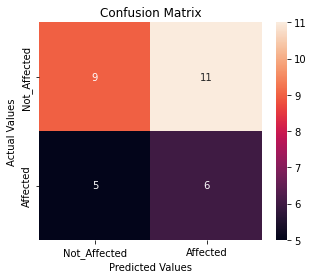

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()